In [1]:
# Bechdel Rating: The actual score. Number from 0 to 3 
# 0 means no two women
# 1 means no talking
# 2 means talking about a man 
# 3 means it passes the test

In [2]:
# Dependencies
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV Files
award_IMDB_csv_path = "awards_IMDB_IDs.csv"
award_movie_df = pd.read_csv(award_IMDB_csv_path, dtype=str)
topgross_IMDB_csv_path = "topgross_IMDB_IDs.csv"
topgross_movie_df = pd.read_csv(topgross_IMDB_csv_path, dtype=str)

In [3]:
# Set award-winning movie ID variable and view dataframe
award_IMDB_IDs = award_movie_df["IMDB ID"]
award_movie_df.head()

,Unnamed: 0,category,year,Movie Title,IMDB ID
0,0,OUTSTANDING PICTURE,1927,Wings,0018578
1,1,OUTSTANDING PICTURE,1928,The Broadway Melody,0019729
2,2,OUTSTANDING PRODUCTION,1929,All Quiet on the Western Front,0020629
3,3,OUTSTANDING PRODUCTION,1930,Cimarron,0021746
4,4,OUTSTANDING PRODUCTION,1931,Grand Hotel,0022958


In [4]:
# Make API request to Bechdel API and retrieve Bechdel Scores for award-winning movies
url = "http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid="

bechdel_scores = []

for movie in award_IMDB_IDs:
    query_url = url + movie

    try:
        movie_request = requests.get(query_url).json()
        bechdel_score = movie_request['rating']
        bechdel_scores.append(bechdel_score)
    
    except:
        bechdel_scores.append("Unknown")
print(bechdel_scores)       

[1, 3, 0, 3, 3, 3, 3, 1, 3, 1, 'Unknown', 3, 3, 3, 3, 1, 'Unknown', 2, 2, 'Unknown', 1, 1, 3, 1, 'Unknown', 3, 0, 3, 1, 1, 2, 3, 3, 3, 0, 3, 3, 3, 1, 1, 'Unknown', 1, 'Unknown', 1, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 'Unknown', 1, 3, 3, 0, 3, 1, 3, 1, 3, 3, 3, 1, 2, 3, 3, 3, 3, 0, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3]


In [23]:
# Add Bechdel Scores to award movie dataframe
award_movie_df["Bechdel Score"] = bechdel_scores
award_movie_df.to_csv('award_movies_bechdel.csv', index=False, header=True)
award_movie_df

,Unnamed: 0,category,year,Movie Title,IMDB ID,Bechdel Score
0,0,OUTSTANDING PICTURE,1927,Wings,0018578,1
1,1,OUTSTANDING PICTURE,1928,The Broadway Melody,0019729,3
2,2,OUTSTANDING PRODUCTION,1929,All Quiet on the Western Front,0020629,0
3,3,OUTSTANDING PRODUCTION,1930,Cimarron,0021746,3
4,4,OUTSTANDING PRODUCTION,1931,Grand Hotel,0022958,3
...,...,...,...,...,...,...
87,87,BEST PICTURE,2015,Spotlight,1895587,1
88,88,BEST PICTURE,2016,Moonlight,4975722,1
89,89,BEST PICTURE,2017,The Shape of Water,5580390,3
90,90,BEST PICTURE,2018,Green Book,6966692,1


In [6]:
# Set top_grossing movie ID variable and view dataframe
topgross_movie_IDs = topgross_movie_df["IMDB ID"]
topgross_movie_df

,Year,Movie ID,Movie Title,Revenue,IMDB ID
0,1927,287262,The Battles of the Coronel and Falkland Islands,6241682,0221007
1,1928,173689,Lights of New York,1200000,0019096
2,1929,65203,The Broadway Melody,4358000,0019729
3,1930,166307,Tom Sawyer,11000000,0070814
4,1931,3035,Frankenstein,12000000,0021884
...,...,...,...,...,...
88,2015,140607,Star Wars: The Force Awakens,2068223624,7768640
89,2016,271110,Captain America: Civil War,1153296293,3498820
90,2017,181808,Star Wars: The Last Jedi,1332539889,3486354
91,2018,299536,Avengers: Infinity War,2046239637,4154756


In [7]:
# Make API request to Bechdel API and retrieve Bechdel Scores for top-grossing movies
url = "http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid="

topgross_bechdel_scores = []

for movie in topgross_movie_IDs:
    query_url = url + movie

    try:
        movie_request = requests.get(query_url).json()
        bechdel_score = movie_request['rating']
        topgross_bechdel_scores.append(bechdel_score)
    
    except:
        topgross_bechdel_scores.append("Unknown")
print(topgross_bechdel_scores)          

['Unknown', 'Unknown', 3, 'Unknown', 1, 3, 0, 2, 1, 0, 3, 'Unknown', 3, 1, 1, 1, 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 0, 'Unknown', 3, 3, 'Unknown', 3, 3, 2, 2, 1, 3, 3, 'Unknown', 3, 3, 3, 1, 3, 'Unknown', 2, 0, 1, 1, 'Unknown', 2, 3, 1, 3, 'Unknown', 1, 1, 1, 0, 3, 3, 1, 0, 2, 2, 3, 1, 0, 3, 3, 0, 3, 1, 1, 3, 3, 1, 3, 0, 3, 3, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 3, 3, 'Unknown', 3, 'Unknown', 3, 3]


In [8]:
# Filled in a few additional Bechdel scores by hand acquired separately
final_topgross_bechdel_scores = ['Unknown', 'Unknown', 3, 'Unknown', 1, 3, 0, 2, 1, 0, 3, 'Unknown', 3, 1, 1, 1, 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 0, 'Unknown', 3, 3, 'Unknown', 3, 3, 2, 2, 1, 3, 3, 2, 3, 3, 3, 1, 3, 'Unknown', 2, 0, 1, 1, 'Unknown', 2, 3, 1, 3, 'Unknown', 1, 1, 1, 0, 3, 3, 1, 0, 2, 2, 3, 1, 0, 3, 3, 0, 3, 1, 1, 3, 3, 1, 3, 0, 3, 3, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3]

In [24]:
# Add Bechdel Scores to top grossing dataframe
topgross_movie_df["Bechdel Score"] = final_topgross_bechdel_scores
topgross_movie_df.to_csv('topgross_movie_bechdel.csv', index=False, header=True)
topgross_movie_df

,Year,Movie ID,Movie Title,Revenue,IMDB ID,Bechdel Score
0,1927,287262,The Battles of the Coronel and Falkland Islands,6241682,0221007,Unknown
1,1928,173689,Lights of New York,1200000,0019096,Unknown
2,1929,65203,The Broadway Melody,4358000,0019729,3
3,1930,166307,Tom Sawyer,11000000,0070814,Unknown
4,1931,3035,Frankenstein,12000000,0021884,1
...,...,...,...,...,...,...
88,2015,140607,Star Wars: The Force Awakens,2068223624,7768640,3
89,2016,271110,Captain America: Civil War,1153296293,3498820,3
90,2017,181808,Star Wars: The Last Jedi,1332539889,3486354,3
91,2018,299536,Avengers: Infinity War,2046239637,4154756,3


In [10]:
# Count films by bechdel score
award_bechdel_count = award_movie_df["Bechdel Score"].value_counts()
print(award_bechdel_count)

topgross_bechdel_count = topgross_movie_df["Bechdel Score"].value_counts()
print(topgross_bechdel_count)

3          41
1          31
2           8
Unknown     7
0           5
Name: Bechdel Score, dtype: int64
3          39
1          21
Unknown    14
2          10
0           9
Name: Bechdel Score, dtype: int64


In [22]:
award_pie_df = pd.DataFrame(award_bechdel_count, index = None)
award_pie_df

,Bechdel Score
3,41
1,31
2,8
Unknown,7
0,5


In [11]:
# Labels for the sections of our pie chart
labels = ["0 - Film does not contain two women characters", 
          "1 - Women present; don't talk to one another", 
          "2 - Women present; talk about a man", 
          "3 - Passes the Bechdel Test", 
          "Unknown"]

award_pie_df["Bechdel Result"]

# The values of each section of the pie chart
number_of_films = award_bechdel_count

In [12]:
award_pie_df = pd.DataFrame({"Bechdel Result":labels, "Number of Films":number_of_films})
# award_pie_df = award_pie_df.rename(columns={0:"Bechdel Result"})
award_pie_df = award_pie_df.sort_values(["Bechdel Result"])
# award_bechdel_count = award_pie_df["Bechdel Score"].value_counts()
award_pie_df

,Bechdel Result,Number of Films
Unknown,0 - Film does not contain two women characters,7
1,1 - Women present; don't talk to one another,31
2,2 - Women present; talk about a man,8
3,3 - Passes the Bechdel Test,41
0,Unknown,5


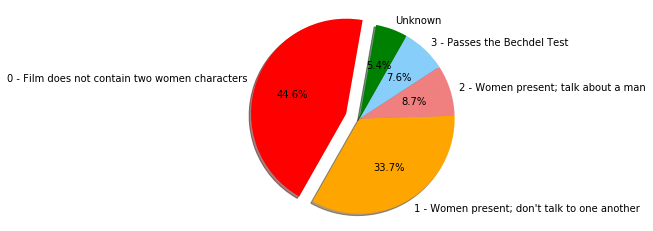

In [13]:
# Labels for the sections of our pie chart
labels = ["0 - Film does not contain two women characters", 
          "1 - Women present; don't talk to one another", 
          "2 - Women present; talk about a man", 
          "3 - Passes the Bechdel Test", 
          "Unknown"]

# The values of each section of the pie chart
number_of_films = award_bechdel_count

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.15, 0, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(number_of_films, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=80)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.show()

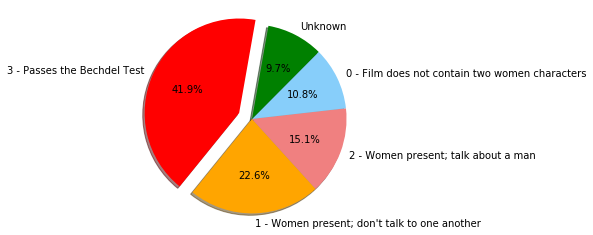

In [14]:
# Labels for the sections of our pie chart
labels = ["3 - Passes the Bechdel Test", 
          "1 - Women present; don't talk to one another", 
          "2 - Women present; talk about a man", 
          "0 - Film does not contain two women characters", 
          "Unknown"]

# The values of each section of the pie chart
number_of_films = topgross_bechdel_count

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.15, 0, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(number_of_films, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=80)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.show()

In [15]:
# All Bechdel scores Data Frame
bechdel_scores_df = pd.DataFrame({
    "Year": award_movie_df["year"],
    "Best Picture": award_movie_df["Movie Title"],
    "Best Picture Bechdel": award_movie_df["Bechdel Score"],
    "Top Grosser": topgross_movie_df["Movie Title"],
    "Top Grosser Bechdel": topgross_movie_df["Bechdel Score"], 
})
bechdel_scores_df = bechdel_scores_df.dropna()
bechdel_scores_df = bechdel_scores_df.drop(bechdel_scores_df[bechdel_scores_df["Best Picture Bechdel"] == "Unknown"].index)
bechdel_scores_df = bechdel_scores_df.drop(bechdel_scores_df[bechdel_scores_df["Top Grosser Bechdel"] == "Unknown"].index)
bechdel_scores_df

,Year,Best Picture,Best Picture Bechdel,Top Grosser,Top Grosser Bechdel
2,1929,All Quiet on the Western Front,0,The Broadway Melody,3
4,1931,Grand Hotel,3,Frankenstein,1
5,1932,Cavalcade,3,Grand Hotel,3
6,1934,It Happened One Night,3,King Kong,0
7,1935,Mutiny on the Bounty,1,The Man Who Knew Too Much,2
...,...,...,...,...,...
87,2015,Spotlight,1,Transformers: Age of Extinction,3
88,2016,Moonlight,1,Star Wars: The Force Awakens,3
89,2017,The Shape of Water,3,Captain America: Civil War,3
90,2018,Green Book,1,Star Wars: The Last Jedi,3


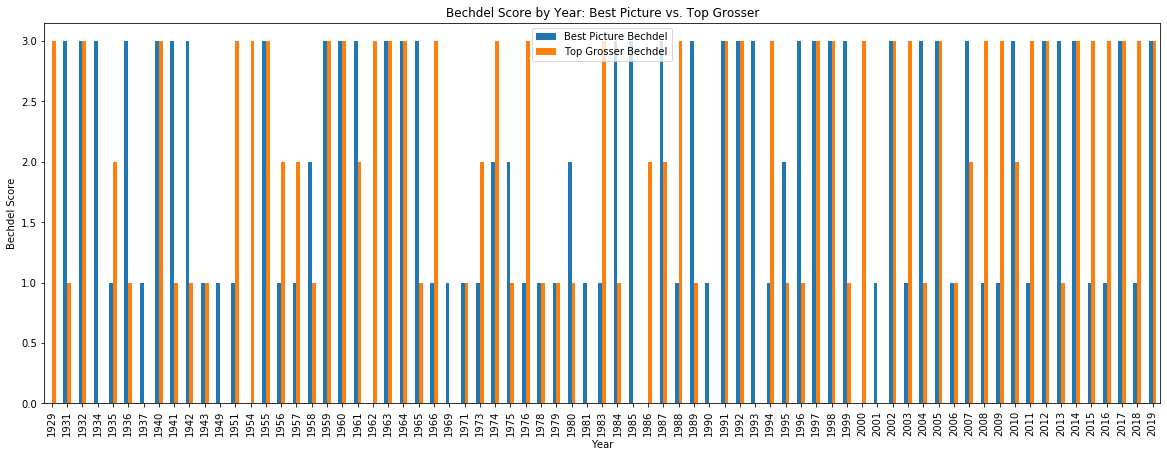

In [16]:
bechdel_scores_df.plot('Year',['Best Picture Bechdel', 'Top Grosser Bechdel'], kind = 'bar',figsize = (20,7))
plt.ylabel('Bechdel Score')
plt.title('Bechdel Score by Year: Best Picture vs. Top Grosser')
plt.show()